In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv("concat_df_terrorism.csv")
pd.set_option('display.max_columns', None)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_11460\1886519131.py:1: DtypeWarning: Columns (56,74,109,110) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("concat_df_terrorism.csv")


In [17]:
df.sample(2)

,iyear,imonth,iday,approxdate,extended,resolution,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
4987,2019,9,29,NaN,0,NaN,Borno,Gubio,12.492000,12.781546,1.0,0,NaN,09/29/2019: Assailants attacked military perso...,1,1,1,0,NaN,NaN,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Nigerian Army (NA),Barracks,147.0,Nigeria,14.0,Private Citizens & Property,67.0,Unnamed Civilian/Unspecified,Not Applicable,Civilians,147.0,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Boko Haram,Al-Barnawi faction (Islamic State West Africa ...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,1.0,7.0,"Posted to website, blog, etc.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Firearms,5.0,Unknown Gun Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,0.0,NaN,NaN,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casualty numbers conflict across sources. Foll...,"""Islamic State claims attack on soldiers in no...","""Islamic State claims attack on soldiers in no...","""Terrorism Digest: 2-3 Oct 19,"" BBC Monitoring...",START Primary Collection,0,0,0,0,NaN
5527,2020,12,19,NaN,0,NaN,Borno,Ajiri,11.909552,13.588398,1.0,0,NaN,"12/19/2020: Assailants attacked Ajiri, Borno, ...",1,1,1,0,NaN,NaN,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,14,Private Citizens & Property,75.0,Village/City/Town/Suburb,Ajiri Village,Village,147.0,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Boko Haram,Al-Barnawi faction (Islamic State West Africa ...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,1.0,7.0,"Posted to website, blog, etc.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Firearms,2.0,Automatic or Semi-Automatic Rifle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Automatic rifles were used in the attack.,10.0,0.0,10.0,NaN,0.0,NaN,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Jihadists kill 5 soldiers, kidnap 35 civilian...","""Nigeria Jihadists Kill Five Soldiers, Kidnap ...","""BREAKING: Again, Boko Haram Attacks Ajiri, Bo...",START Primary Collection,0,0,0,0,NaN


In [18]:
df['nhostkidus'].unique()

array([ nan,   0.,   1., -99.,   7.,  17.,   2.,   4.,   3.])

In [19]:
df.columns

Index(['iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution',
       'provstate', 'city', 'latitude', 'longitude',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=130)

In [20]:
df.shape

(5998, 130)

In [21]:
df.isnull().sum()

iyear            0
imonth           0
iday             0
approxdate    5684
extended         0
              ... 
INT_LOG          0
INT_IDEO         0
INT_MISC         0
INT_ANY          0
related       3977
Length: 130, dtype: int64

In [22]:
df.isnull().mean() * 100

iyear          0.000000
imonth         0.000000
iday           0.000000
approxdate    94.764922
extended       0.000000
                ...    
INT_LOG        0.000000
INT_IDEO       0.000000
INT_MISC       0.000000
INT_ANY        0.000000
related       66.305435
Length: 130, dtype: float64

In [23]:
# Get the counts of null values for all columns
null_counts = df.isnull().sum()

# Loop through columns and print null counts
for cols,count in null_counts.items():
    percentage = (count/len(df))*100
    print(f"{cols} :{count}:{percentage:.1f})")

iyear :0:0.0)
imonth :0:0.0)
iday :0:0.0)
approxdate :5684:94.8)
extended :0:0.0)
resolution :5768:96.2)
provstate :0:0.0)
city :0:0.0)
latitude :48:0.8)
longitude :48:0.8)
specificity :0:0.0)
vicinity :0:0.0)
location :3202:53.4)
summary :60:1.0)
crit1 :0:0.0)
crit2 :0:0.0)
crit3 :0:0.0)
doubtterr :0:0.0)
alternative :5270:87.9)
alternative_txt :5270:87.9)
multiple :0:0.0)
success :0:0.0)
suicide :0:0.0)
attacktype1 :0:0.0)
attacktype1_txt :0:0.0)
attacktype2 :4485:74.8)
attacktype2_txt :4485:74.8)
attacktype3 :5843:97.4)
attacktype3_txt :5843:97.4)
targtype1 :0:0.0)
targtype1_txt :0:0.0)
targsubtype1 :167:2.8)
targsubtype1_txt :167:2.8)
corp1 :170:2.8)
target1 :5:0.1)
natlty1 :10:0.2)
natlty1_txt :10:0.2)
targtype2 :5377:89.6)
targtype2_txt :5377:89.6)
targsubtype2 :5390:89.9)
targsubtype2_txt :5390:89.9)
corp2 :5405:90.1)
target2 :5379:89.7)
natlty2 :5387:89.8)
natlty2_txt :5387:89.8)
targtype3 :5896:98.3)
targtype3_txt :5896:98.3)
targsubtype3 :5899:98.3)
targsubtype3_txt :5899:98.

## Removing the columns that have missing values greater than 50%

#### 75 columns are removed
#### (5998, 55) are left for our Analysis

In [24]:
missing_percentage  = df.isnull().mean() *100
columns_to_remove = missing_percentage[missing_percentage > 50].index
df = df.drop(columns=columns_to_remove)
df.head(2)

,iyear,imonth,iday,extended,provstate,city,latitude,longitude,specificity,vicinity,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propcomment,ishostkid,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,1976,2,13,0,Lagos,Lagos,6.452331,3.419044,1.0,0,02/13/1976: Assailants attacked General Murtal...,1,1,1,0,0.0,1,0,1,Assassination,2,Government (General),17.0,Head of State,Government of Nigeria,4th Head of State: General Murtala Ramat Mohammed,147.0,Nigeria,Coup plotters,0.0,0,-99.0,-99.0,0.0,5,Firearms,2.0,Automatic or Semi-Automatic Rifle,3.0,0.0,0.0,1.0,0.0,0.0,0,NaN,0.0,"Segun Akande, ""42 years ago, one of Nigeria's ...","""Anniversary: Motoring Error that Led to the K...",NaN,UMD Miscellaneous,-9,-9,0,-9
1,1980,1,17,0,Kaduna,Kaduna,10.530204,7.437338,1.0,0,NaN,1,1,1,0,0.0,1,0,9,Unknown,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,Consulate,216.0,Great Britain,Zimbabwe Patriotic Front,0.0,0,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1.0,NaN,NaN,NaN,PGIS,1,1,1,1


In [34]:
df.shape

(5998, 55)

# How many Suicide attacks happened

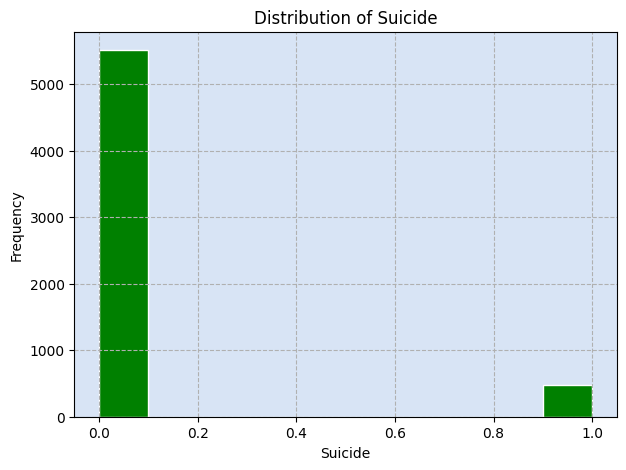

In [25]:
plt.figure(figsize=(7,5)) # Set the figure size
# Customize the color and edgecolor of the bars
plt.hist(df['suicide'],bins=10,color='green',edgecolor ='white')
# Add labels and title
plt.xlabel('Suicide')
plt.ylabel('Frequency')
plt.title('Distribution of Suicide')
# Add grid lines
plt.grid(True,linestyle='--',alpha=1)
# Customize the tick labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add a nice background color to the plot
plt.gca().set_facecolor('#D8E4F5')

In [36]:
print(df['multiple'].unique())
print(df['success'].unique())
print(df['summary'].nunique())

[0. 1.]
[1 0]
5808


In [33]:
print(df['city'].nunique())

2615


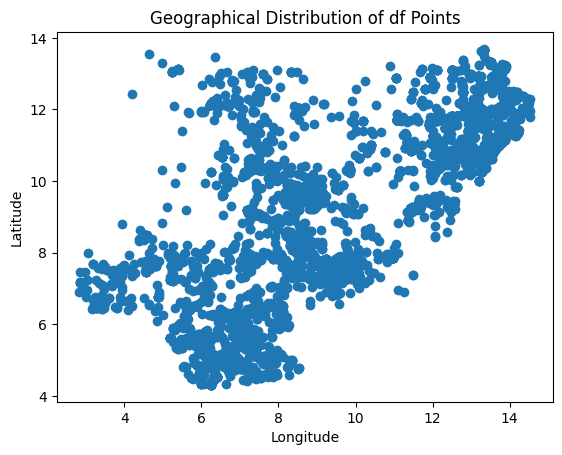

Maiduguri        494
Unknown          239
Kano             130
Port Harcourt     77
Potiskum          65
                ... 
Ugbende Mue        1
Uzaagir            1
Afom               1
Mkpikpa            1
Zargwra            1
Name: city, Length: 2615, dtype: int64


In [29]:
# Scatter plot of latitude and longitude
plt.scatter(df['longitude'], df['latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of df Points')
plt.show()

# Grouping df by city and analyzing
city_counts = df['city'].value_counts()
print(city_counts)  # Display the count of df points for each city



KeyError: 'Column not found: numerical_variable'

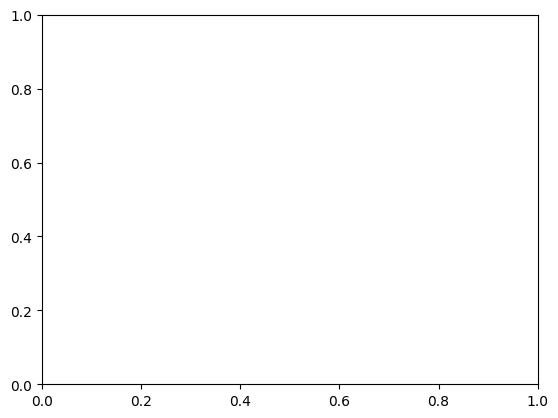

In [30]:
# Box plot of a numerical variable for each city
df.boxplot(column='numerical_variable', by='city')
plt.xlabel('City')
plt.ylabel('Numerical Variable')
plt.title('Distribution of Numerical Variable by City')
plt.xticks(rotation=45)
plt.show()

# Histogram of a numerical variable for a specific city
specific_city = 'New York'
df[df['city'] == specific_city]['numerical_variable'].plot.hist()
plt.xlabel('Numerical Variable')
plt.ylabel('Frequency')
plt.title(f'Distribution of Numerical Variable in {specific_city}')
plt.show()

In [ ]:
print(df['extended'].unique())   ## what is extended [0,1]
print(df['provstate'].unique())

[0 1]
['Lagos' 'Kaduna' 'Unknown' 'Katsina' 'Zamfara' 'Kano' 'Akwa Ibom' 'Edo'
 'Taraba' 'Ondo' 'Bayelsa' 'Cross River' 'Abuja' 'Oyo' 'Anambra' 'Rivers'
 'Osun' 'Ekiti' 'Delta' 'Enugu' 'Ogun' 'Plateau' 'Kwara' 'Imo' 'Kogi'
 'Borno' 'Bauchi' 'Sokoto' 'Abia' 'Benue' 'Ebonyi' 'Adamawa' 'Gombe'
 'Niger' 'Kebbi' 'Yobe' 'Jigawa' 'Nasarawa']


In [ ]:
print(df['city'].nunique())

2615
